<a id='top'></a>

# Frequency Response Functions (FRFs) plots

This notebook is about [frequency response functions](http://www.vibrationdata.com/tutorials/frf.pdf) (FRFs) and the various ways they can be plotted.

## Table of contents

[Preamble](#Preamble)

[Dynamic system setup](#Dynamic-system-setup)

[Frequency response function](#Frequency-response_function)

[Nyquist plot](#Nyquist-plot)

[Bode plot](#Bode-plot)

[Nichols plot](#Nichols-plot)

[Odds and ends](#Odds-and-ends)

## Preamble

We will start by setting up the computational environment for this notebook. Since it was created with Python 2.7, we will import a few things from the "future". Furthermore, we will need numpy and scipy for the numerical simulations and matplotlib for the plots:

In [1]:
from __future__ import division, print_function

import sys
import numpy as np
import scipy as sp
import matplotlib as mpl

print('System: {}'.format(sys.version))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(sp.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

System: 2.7.9 |Anaconda 2.1.0 (32-bit)| (default, Mar  9 2015, 16:21:41) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy version: 1.9.2
scipy version: 0.15.1
matplotlib version: 1.4.3


We will also need some specific modules and a litle "IPython magic" to show the plots:

In [2]:
from numpy import linalg as LA
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline

[Back to top](#top)

## Dynamic system setup

In this example we will simulate a two degree of freedom system (2DOF) as a [LTI system](http://en.wikipedia.org/wiki/LTI_system_theory). For that purpose, we will define a mass and a stiffness matrix and use proportional damping:

In [3]:
MM = np.asmatrix(np.diag([1., 2.]))
print(MM)

[[ 1.  0.]
 [ 0.  2.]]


In [4]:
KK = np.asmatrix([[20., -10.],[-10., 10.]])
print(KK)

[[ 20. -10.]
 [-10.  10.]]


In [5]:
C1 = 0.1*MM+0.02*KK
print(C1)

[[ 0.5 -0.2]
 [-0.2  0.4]]


For the LTI system we will use a [state space formulation](http://en.wikipedia.org/wiki/State-space_representation). For that we will need the four matrices describing the system (A), the input (B), the output (C) and the feedthrough (D):

In [6]:
A = np.bmat([[np.zeros_like(MM), np.identity(MM.shape[0])], [LA.solve(-MM,KK), LA.solve(-MM,C1)]])
print(A)

[[  0.    0.    1.    0. ]
 [  0.    0.    0.    1. ]
 [-20.   10.   -0.5   0.2]
 [  5.   -5.    0.1  -0.2]]


In [7]:
Bf = KK*np.asmatrix(np.ones((2, 1)))
B = np.bmat([[np.zeros_like(Bf)],[LA.solve(MM,Bf)]])
print(B)

[[  0.]
 [  0.]
 [ 10.]
 [  0.]]


In [8]:
Cd = np.matrix((1,0))
Cv = np.asmatrix(np.zeros((1,MM.shape[1])))
Ca = np.asmatrix(np.zeros((1,MM.shape[1])))
C = np.bmat([Cd-Ca*LA.solve(MM,KK),Cv-Ca*LA.solve(MM,C1)])
print(C)

[[ 1.  0.  0.  0.]]


In [9]:
D = Ca*LA.solve(MM,Bf)
print(D)

[[ 0.]]


The LTI system is simply defined as:

In [10]:
system = signal.lti(A, B, C, D)

/home/hpw5070pt/anaconda/lib/python2.7/site-packages/scipy/signal/filter_design.py:400: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


To check the results presented ahead we will need the angular frequencies and damping coefficients of this system. The eigenanalysis of the system matrix yields them after some computations:

In [11]:
w1, v1 = LA.eig(A)
ix = np.argsort(np.absolute(w1)) # order of ascending eigenvalues
w1 = w1[ix] # sorted eigenvalues
v1 = v1[:,ix] # sorted eigenvectors
zw = -w1.real # damping coefficient time angular frequency
wD = w1.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [ 1.48062012  4.77574749]
Damping coefficient: [ 0.04857584  0.05822704]


[Back to top](#top)

## Frequency response function

A frequency response function is a complex valued function of frequency. Let us see how it looks when we plot the real and imaginary parts in separate:

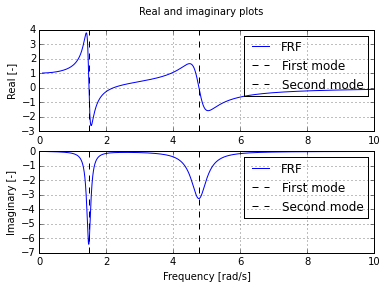

In [12]:
w, H = system.freqresp()
fig, ax = plt.subplots(2, 1)
fig.suptitle('Real and imaginary plots')
# Real part plot
ax[0].plot(w, H.real, label='FRF')
ax[0].axvline(wn[0], color='k', label='First mode', linestyle='--')
ax[0].axvline(wn[2], color='k', label='Second mode', linestyle='--')
ax[0].set_ylabel('Real [-]')
ax[0].grid(True)
ax[0].legend()
# Imaginary part plot
ax[1].plot(w, H.imag, label='FRF')
ax[1].axvline(wn[0], color='k', label='First mode', linestyle='--')
ax[1].axvline(wn[2], color='k', label='Second mode', linestyle='--')
ax[1].set_ylabel('Imaginary [-]')
ax[1].set_xlabel('Frequency [rad/s]')
ax[1].grid(True)
ax[1].legend()
plt.show()

[Back to top](#top)

## Nyquist plot

A [Nyquist plot](http://en.wikipedia.org/wiki/Nyquist_plot) represents the real and imaginary parts of the complex FRF in a single plot:

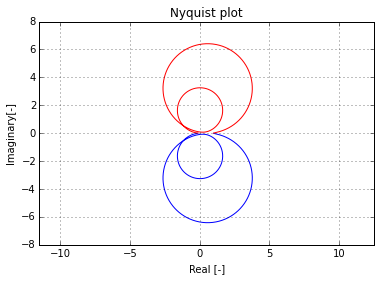

In [13]:
plt.figure()
plt.title('Nyquist plot')
plt.plot(H.real, H.imag, 'b')
plt.plot(H.real, -H.imag, 'r')
plt.xlabel('Real [-]')
plt.ylabel('Imaginary[-]')
plt.grid(True)
plt.axis('equal')
plt.show()

[Back to top](#top)

## Bode plot

A [Bode plot](http://en.wikipedia.org/wiki/Bode_plot) represents the complex FRF in magnitude-phase versus frequency:

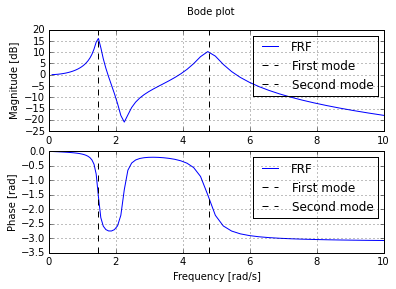

In [14]:
w, mag, phase = system.bode()
fig, ax = plt.subplots(2, 1)
fig.suptitle('Bode plot')
# Magnitude plot
ax[0].plot(w, mag, label='FRF')
ax[0].axvline(wn[0], color='k', label='First mode', linestyle='--')
ax[0].axvline(wn[2], color='k', label='Second mode', linestyle='--')
ax[0].set_ylabel('Magnitude [dB]')
ax[0].grid(True)
ax[0].legend()
# Phase plot
ax[1].plot(w, phase*np.pi/180., label='FRF')
ax[1].axvline(wn[0], color='k', label='First mode', linestyle='--')
ax[1].axvline(wn[2], color='k', label='Second mode', linestyle='--')
ax[1].set_ylabel('Phase [rad]')
ax[1].set_xlabel('Frequency [rad/s]')
ax[1].grid(True)
ax[1].legend()
plt.show()

[Back to top](#top)

## Nichols plot

A [Nichols plot](http://en.wikipedia.org/wiki/Nichols_plot) combines the Bode plot in a single plot of magnitude versus phase:

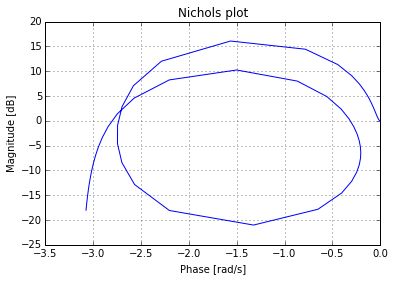

In [15]:
plt.figure()
plt.title('Nichols plot')
plt.plot(phase*np.pi/180., mag)
plt.xlabel('Phase [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()

[Back to top](#top)

## Odds and ends

This notebook was created by Paulo Xavier Candeias.

[Back to top](#top)